In [38]:
import numpy as np
import keras
import scipy.stats as stats
import pylab as pl
import time
import json
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.layers import Dense, Dropout

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [2]:
origin_data = np.loadtxt("data.txt")

In [3]:
origin_data2 = pd.read_csv("R_modelling/selected_features_remove_outliers.csv")
origin_data2 = origin_data2.values

In [4]:
data = origin_data
data.shape

(10580, 181)

In [5]:
dataX = data[:,0:-1]
dataY = data[:,-1]
dataY = dataY.reshape(-1,1)

# Some stats

max: 21472.926260118013 
min: 0.04991243502339581 
mean: 344.4511560060772 
std: 625.2633153192716


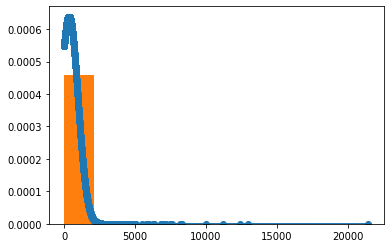

In [6]:
sorted_mir = -np.sort(-origin_data[:,-1])
print("max:", max(sorted_mir),"\nmin:", min(sorted_mir), "\nmean:", sorted_mir.mean(), "\nstd:", sorted_mir.std())
fit_mir = stats.norm.pdf(sorted_mir, np.mean(sorted_mir), np.std(sorted_mir))
pl.plot(sorted_mir, fit_mir, '-o')
pl.hist(sorted_mir, density=True)
pl.show()

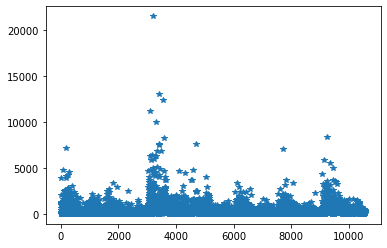

In [7]:
plt.plot(dataY, "*")

In [8]:
mir_zscore = np.abs(stats.zscore(dataY))
print(mir_zscore)
outliers_zscore = np.where(mir_zscore > 3)
print(outliers_zscore)
print(len(outliers_zscore[0]))

[[5.60279884]
 [2.78897127]
 [0.40389807]
 ...
 [0.37960693]
 [0.16216429]
 [0.24599199]]
(array([   0,   66,  110,  138,  140,  141,  147,  169,  170,  175,  207,
        234,  237,  241,  270,  279,  280,  322,  325,  390,  448, 1607,
       1658, 1681, 1686, 1797, 1952, 2330, 3020, 3021, 3048, 3052, 3054,
       3056, 3059, 3060, 3063, 3071, 3079, 3080, 3081, 3082, 3086, 3122,
       3130, 3141, 3158, 3161, 3166, 3167, 3189, 3190, 3193, 3194, 3195,
       3197, 3210, 3211, 3213, 3227, 3230, 3234, 3236, 3254, 3257, 3261,
       3299, 3300, 3306, 3344, 3345, 3346, 3406, 3407, 3408, 3409, 3410,
       3412, 3461, 3463, 3464, 3469, 3524, 3538, 3563, 3571, 3579, 3595,
       3607, 3610, 3618, 3621, 3624, 3626, 3627, 3638, 4089, 4221, 4229,
       4307, 4532, 4564, 4598, 4678, 4700, 4701, 4706, 4738, 5026, 5048,
       5081, 6043, 6109, 6184, 6218, 6323, 6432, 6561, 7622, 7731, 7790,
       7836, 8051, 8842, 9067, 9068, 9095, 9129, 9133, 9169, 9177, 9208,
       9236, 9237, 9242, 9252, 92

In [9]:
dataX = origin_data[:,0:-1]
dataY = origin_data[:,-1]
dataY = dataY.reshape(-1,1)

In [10]:
dataX_drop = np.delete(dataX, outliers_zscore[0], axis=0)
dataY_drop = np.delete(dataY, outliers_zscore[0], axis=0)

In [11]:
dataX = dataX_drop
dataY = dataY_drop

In [12]:
dataX.shape

(10428, 180)

max: 2219.373481882368 
min: 0.04991243502339581 
mean: 292.8973937355639 
std: 359.5003189990006


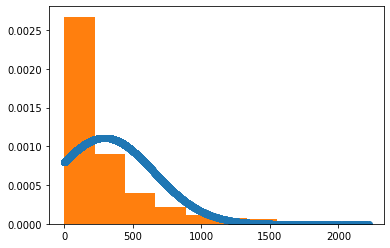

In [13]:
sorted_mir = -np.sort(-dataY[:,0])
print("max:", max(sorted_mir),"\nmin:", min(sorted_mir), "\nmean:", sorted_mir.mean(), "\nstd:", sorted_mir.std())
fit_mir = stats.norm.pdf(sorted_mir, np.mean(sorted_mir), np.std(sorted_mir))
pl.plot(sorted_mir, fit_mir, '-o')
pl.hist(sorted_mir, density=True)
pl.show()

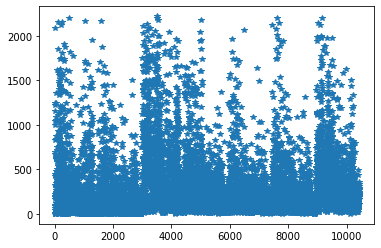

In [14]:
plt.plot(dataY, "*")

In [15]:
np.max(dataY)

2219.373481882368

# Neural Network

In [27]:
# generate training set and test set
trainX, testX, trainY, testY = train_test_split(dataX, dataY, test_size = 0.33, shuffle = True)

In [30]:
np.min(testY_scaled)

-0.814351363757498

In [29]:
# Scaling (Normalization)
# z-score (z = (x-u)/s)
scaler_trainX, scaler_trainY, trainX_scaled, testX_scaled, trainY_scaled, testY_scaled = data_scale(
    trainX, testX, trainY, testY, scale_type="z-score")
# min-max (x-x_min)/(x_max-x_min) * (max-min) + min
#scaler_trainX, scaler_trainY, trainX_scaled, testX_scaled, trainY_scaled, testY_scaled = data_scale(
#    trainX, testX, trainY, testY, scale_type="z-score")

In [23]:
def data_scale(trainX, testX, trainY, testY, scale_type = "z-score"):
    scaler_trainX = None
    scaler_trainY = None
    
    if scale_type == "z-score":
        scaler_trainX = preprocessing.StandardScaler().fit(trainX)
        trainX_scaled = scaler_trainX.transform(trainX)
        testX_scaled = scaler_trainX.transform(testX)

        scaler_trainY = preprocessing.StandardScaler().fit(trainY)
        trainY_scaled = scaler_trainY.transform(trainY)
        testY_scaled = scaler_trainY.transform(testY)
    
    elif scale_type == "min-max":
        scaler_trainX = preprocessing.MinMaxScaler().fit(trainX)
        trainX_scaled = scaler_trainX.transform(trainX)
        testX_scaled = scaler_trainX.transform(testX)

        scaler_trainY = preprocessing.MinMaxScaler().fit(trainY)
        trainY_scaled = scaler_trainY.transform(trainY)
        testY_scaled = scaler_trainY.transform(testY)
        
    return scaler_trainX, scaler_trainY, trainX_scaled, testX_scaled, trainY_scaled, testY_scaled
        

In [24]:
def reconstruct_from_sclae(scaler, data):
    return scaler.inverse_transform(data)

In [25]:
def model_NN_test(model_NN, dataX, dataY, scaler_trainX, scaler_trainY):
    print("Model performance")
    predict_data = model_NN.predict(dataX)
    
    if scaler_trainX != None and scaler_trainY != None:
        dataX = reconstruct_from_sclae(scaler_trainX, dataX)
        dataY = reconstruct_from_sclae(scaler_trainY, dataY)
        predict_data = reconstruct_from_sclae(scaler_trainY, predict_data)
    
    # Some stats
    print("MSE:", metrics.mean_squared_error(dataY, predict_data))
    print("MAE:", metrics.mean_absolute_error(dataY, predict_data))
    print("R2:", metrics.r2_score(dataY, predict_data))
    errors = abs((dataY - predict_data) / dataY)
    mean_errors = np.mean(errors)
    mean_accuracy = 1 - mean_errors
    print("Mean Accuracy:", mean_accuracy * 100, "%")
    
    plt.figure(1)
    plt.xlabel('True MIR')
    plt.ylabel('Predicted MIR')
    plt.plot(dataY, predict_data, "*")
    plt.show()
    
    plt.figure(2)
    plt.plot(dataY, label = 'actual data')
    plt.plot(predict_data, label = 'predict data')
    plt.xlabel('Tract')
    plt.ylabel('MIR')
    plt.legend(loc = 'best')
    plt.show()
    
    return errors

In [26]:
def NN_model():
    dropout_rate = 0
    
    model = Sequential()
    model.add(Dense(256, activation = "elu", input_dim = 180))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128, activation = "elu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation = "elu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation = "elu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, activation = "elu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, activation = "elu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss = "mean_squared_error", optimizer = "adam") 
    return model

In [35]:
seed = 0
np.random.seed(seed)
estimators = []
estimators.append(('standardize', preprocessing.StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=NN_model, epochs = 100, batch_size = 32)))
pipeline = Pipeline(estimators) 
kfold = KFold(n_splits=3, random_state=seed)
results = cross_val_score(estimators, dataX, dataY, cv=kfold)

TypeError: estimator should be an estimator implementing 'fit' method, [('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', <keras.wrappers.scikit_learn.KerasRegressor object at 0x7f5129ad8588>)] was passed

In [25]:
results.mean()

NameError: name 'results' is not defined

In [71]:
time_start = time.time()
dropout_rate = 0.4
activation_function = "elu" # elu, relu, sigmoid, tanh, linear, softmax
    
model = Sequential()
model.add(Dense(16, kernel_initializer='normal', activation = "elu", input_dim = trainX_scaled.shape[1]))
model.add(Dropout(dropout_rate))
model.add(Dense(8, kernel_initializer='normal', activation = "elu"))
model.add(Dropout(dropout_rate))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss = "mean_squared_error", optimizer = "adam") 
# mean_absolute_error, mean_squared_error;
# SGD, adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam
train_history = model.fit(x = trainX_scaled, y = trainY_scaled, 
                                    epochs = 500, batch_size = 16, 
                                    validation_data = (testX_scaled, testY_scaled))
model_history = train_history.history
time_consumed = time.time() - time_start

Train on 6986 samples, validate on 3442 samples
Epoch 1/500
6986/6986 [==============================] - 1s 202us/step - loss: 0.7890 - val_loss: 0.6915
Epoch 2/500
6986/6986 [==============================] - 1s 103us/step - loss: 0.7514 - val_loss: 0.6786
Epoch 3/500
6986/6986 [==============================] - 1s 98us/step - loss: 0.7367 - val_loss: 0.6737
Epoch 4/500
6986/6986 [==============================] - 1s 86us/step - loss: 0.7318 - val_loss: 0.6667
Epoch 5/500
6986/6986 [==============================] - 1s 87us/step - loss: 0.7282 - val_loss: 0.6656
Epoch 6/500
6986/6986 [==============================] - 1s 88us/step - loss: 0.7331 - val_loss: 0.6715
Epoch 7/500
6986/6986 [==============================] - 1s 87us/step - loss: 0.7189 - val_loss: 0.6636
Epoch 8/500
6986/6986 [==============================] - 1s 91us/step - loss: 0.7242 - val_loss: 0.6581
Epoch 9/500
6986/6986 [==============================] - 1s 92us/step - loss: 0.7162 - val_loss: 0.6773
Epoch 10/500
6

6986/6986 [==============================] - 1s 84us/step - loss: 0.6643 - val_loss: 0.6486
Epoch 79/500
6986/6986 [==============================] - 1s 82us/step - loss: 0.6802 - val_loss: 0.6349
Epoch 80/500
6986/6986 [==============================] - 1s 79us/step - loss: 0.6753 - val_loss: 0.6412
Epoch 81/500
6986/6986 [==============================] - 1s 94us/step - loss: 0.6722 - val_loss: 0.6406
Epoch 82/500
6986/6986 [==============================] - 1s 79us/step - loss: 0.6748 - val_loss: 0.6335
Epoch 83/500
6986/6986 [==============================] - 1s 92us/step - loss: 0.6827 - val_loss: 0.6466
Epoch 84/500
6986/6986 [==============================] - 1s 86us/step - loss: 0.6698 - val_loss: 0.6389
Epoch 85/500
6986/6986 [==============================] - 1s 85us/step - loss: 0.6787 - val_loss: 0.6389
Epoch 86/500
6986/6986 [==============================] - 1s 82us/step - loss: 0.6745 - val_loss: 0.6391
Epoch 87/500
6986/6986 [==============================] - 1s 85us/st

6986/6986 [==============================] - 1s 81us/step - loss: 0.6583 - val_loss: 0.6416
Epoch 156/500
6986/6986 [==============================] - 1s 79us/step - loss: 0.6527 - val_loss: 0.6416
Epoch 157/500
6986/6986 [==============================] - 1s 80us/step - loss: 0.6627 - val_loss: 0.6428
Epoch 158/500
6986/6986 [==============================] - 1s 86us/step - loss: 0.6587 - val_loss: 0.6389
Epoch 159/500
6986/6986 [==============================] - 1s 85us/step - loss: 0.6597 - val_loss: 0.6428
Epoch 160/500
6986/6986 [==============================] - 1s 80us/step - loss: 0.6470 - val_loss: 0.6447
Epoch 161/500
6986/6986 [==============================] - 1s 95us/step - loss: 0.6514 - val_loss: 0.6383
Epoch 162/500
6986/6986 [==============================] - 1s 84us/step - loss: 0.6569 - val_loss: 0.6399
Epoch 163/500
6986/6986 [==============================] - 1s 85us/step - loss: 0.6463 - val_loss: 0.6421
Epoch 164/500
6986/6986 [==============================] - 1

6986/6986 [==============================] - 1s 81us/step - loss: 0.6416 - val_loss: 0.6364
Epoch 233/500
6986/6986 [==============================] - 1s 79us/step - loss: 0.6415 - val_loss: 0.6432
Epoch 234/500
6986/6986 [==============================] - 1s 79us/step - loss: 0.6398 - val_loss: 0.6408
Epoch 235/500
6986/6986 [==============================] - 1s 78us/step - loss: 0.6428 - val_loss: 0.6410
Epoch 236/500
6986/6986 [==============================] - 1s 81us/step - loss: 0.6463 - val_loss: 0.6503
Epoch 237/500
6986/6986 [==============================] - 1s 92us/step - loss: 0.6431 - val_loss: 0.6458
Epoch 238/500
6986/6986 [==============================] - 1s 82us/step - loss: 0.6351 - val_loss: 0.6498
Epoch 239/500
6986/6986 [==============================] - 1s 83us/step - loss: 0.6377 - val_loss: 0.6418
Epoch 240/500
6986/6986 [==============================] - 1s 83us/step - loss: 0.6549 - val_loss: 0.6355
Epoch 241/500
6986/6986 [==============================] - 1

6986/6986 [==============================] - 1s 84us/step - loss: 0.6281 - val_loss: 0.6416
Epoch 310/500
6986/6986 [==============================] - 1s 84us/step - loss: 0.6322 - val_loss: 0.6378
Epoch 311/500
6986/6986 [==============================] - 1s 83us/step - loss: 0.6309 - val_loss: 0.6424
Epoch 312/500
6986/6986 [==============================] - 1s 84us/step - loss: 0.6434 - val_loss: 0.6450
Epoch 313/500
6986/6986 [==============================] - 1s 84us/step - loss: 0.6327 - val_loss: 0.6426
Epoch 314/500
6986/6986 [==============================] - 1s 82us/step - loss: 0.6351 - val_loss: 0.6404
Epoch 315/500
6986/6986 [==============================] - 1s 84us/step - loss: 0.6417 - val_loss: 0.6400
Epoch 316/500
6986/6986 [==============================] - 1s 83us/step - loss: 0.6355 - val_loss: 0.6421
Epoch 317/500
6986/6986 [==============================] - 1s 101us/step - loss: 0.6420 - val_loss: 0.6370
Epoch 318/500
6986/6986 [==============================] - 

6986/6986 [==============================] - 1s 85us/step - loss: 0.6293 - val_loss: 0.6386
Epoch 387/500
6986/6986 [==============================] - 1s 83us/step - loss: 0.6381 - val_loss: 0.6359
Epoch 388/500
6986/6986 [==============================] - 1s 84us/step - loss: 0.6398 - val_loss: 0.6377
Epoch 389/500
6986/6986 [==============================] - 1s 83us/step - loss: 0.6239 - val_loss: 0.6391
Epoch 390/500
6986/6986 [==============================] - 1s 88us/step - loss: 0.6314 - val_loss: 0.6428
Epoch 391/500
6986/6986 [==============================] - 1s 84us/step - loss: 0.6334 - val_loss: 0.6391
Epoch 392/500
6986/6986 [==============================] - 1s 84us/step - loss: 0.6317 - val_loss: 0.6368
Epoch 393/500
6986/6986 [==============================] - 1s 81us/step - loss: 0.6324 - val_loss: 0.6367
Epoch 394/500
6986/6986 [==============================] - 1s 84us/step - loss: 0.6258 - val_loss: 0.6374
Epoch 395/500
6986/6986 [==============================] - 1

6986/6986 [==============================] - 0s 70us/step - loss: 0.6343 - val_loss: 0.6443
Epoch 464/500
6986/6986 [==============================] - 0s 70us/step - loss: 0.6314 - val_loss: 0.6357
Epoch 465/500
6986/6986 [==============================] - 1s 76us/step - loss: 0.6423 - val_loss: 0.6476
Epoch 466/500
6986/6986 [==============================] - 1s 74us/step - loss: 0.6316 - val_loss: 0.6402
Epoch 467/500
6986/6986 [==============================] - 0s 71us/step - loss: 0.6224 - val_loss: 0.6384
Epoch 468/500
6986/6986 [==============================] - 1s 72us/step - loss: 0.6235 - val_loss: 0.6398
Epoch 469/500
6986/6986 [==============================] - 1s 72us/step - loss: 0.6290 - val_loss: 0.6340
Epoch 470/500
6986/6986 [==============================] - 1s 73us/step - loss: 0.6306 - val_loss: 0.6421
Epoch 471/500
6986/6986 [==============================] - 0s 69us/step - loss: 0.6285 - val_loss: 0.6417
Epoch 472/500
6986/6986 [==============================] - 0

In [59]:
time_consumed

315.00990056991577

Model performance
MSE: 64420.92165623727
MAE: 164.33879310776672
R2: 0.5045794354079499
Mean Accuracy: -214.93344794271806 %


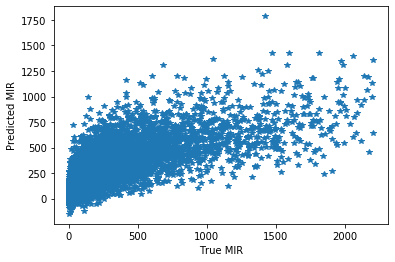

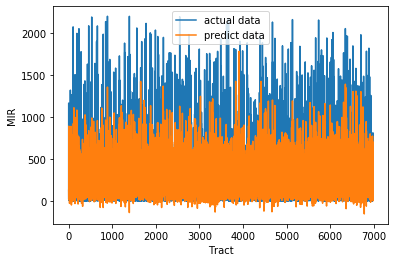

In [60]:
errors_train = model_NN_test(model, trainX_scaled, trainY_scaled, scaler_trainX, scaler_trainY)

Model performance
MSE: 83524.73787365312
MAE: 187.62338491390386
R2: 0.34556281252162335
Mean Accuracy: -438.6490293068266 %


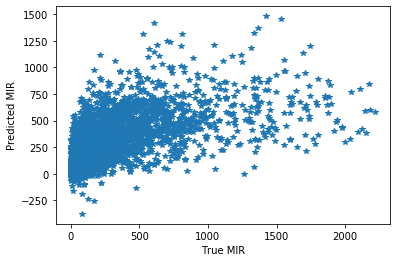

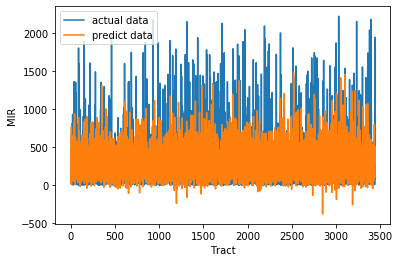

In [61]:
errors_test = model_NN_test(model, testX_scaled, testY_scaled, scaler_trainX, scaler_trainY)

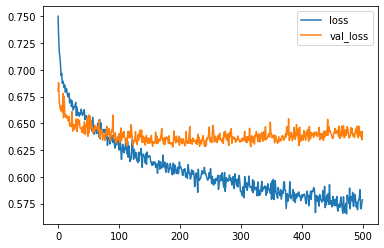

In [65]:
plt.plot(model_history['loss'], label = 'loss')
plt.plot(model_history['val_loss'], label = 'val_loss')
plt.legend(loc = "best")

In [32]:
len(errors_test)

3442

In [33]:
len(errors_test[errors_test<0.5])

1568

In [66]:
# save history
with open("model_500_history_2.json", "w") as history_file:
    history_file.write(json.dumps(train_history.history))

In [67]:
# read history
with open("model_500_history_2.json") as history_file:
        model_history = json.loads(history_file.read())

In [68]:
# save model
model.save("model_500_2.h5")

In [69]:
# read model
model = keras.models.load_model('model_500_2.h5')

In [70]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                5792      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 5,825
Trainable params: 5,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def NN():
    trainX = None
    trainY = None
    testX = None
    testY = None
    model = None
    score = None
    
    def __init__ (self,
                  dropout_layer_rate = 0.1,
                  rnn_dropout_rate = 0.1,
                  nb_epoch = 50,
                  batch_size = 16,
                  loss = 'mean_absolute_error',
                  optimizer = 'adam',
                  save_model = True,
                  save_model_path = ''):

        self.dropout_layer_rate = dropout_layer_rate
        self.rnn_dropout_rate = rnn_dropout_rate
        self.nb_epoch = nb_epoch
        self.batch_size = batch_size
        self.loss = loss
        self.optimizer = optimizer #rmsprop, adam
        self.save_model = save_model
        self.save_model_path = save_model_path
        
    def NN_getData(self, trainX, trainY, testX, testY):
        self.trainX = trainX
        self.trainY = trainY
        self.testX = testX
        self.testY = testY

        return True
    
    def NN_model_train(self):
        trainX = self.trainX
        trainY = self.trainY
        testX = self.testX
        testY = self.testY
        model = self.model
        dropout_layer_rate = self.dropout_layer_rate
        rnn_dropout_rate = self.rnn_dropout_rate
        
        input_dim = trainX.shape
        
        model = Sequential()
        model.add()